# PROJECT

# ENHANCING LOGISTICS:PREDICTIVE MODEL FOR TIMELY DELIVERIES

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
data=pd.read_csv(r"C:\Users\jenan\Downloads\DataCoSupplyChainDataset.csv\DataCoSupplyChainDataset.csv",encoding_errors="ignore")

# DATA UNDERSTANDING & EXPLORATORY DATA ANALYSIS

In [3]:
#To display the first five rows of the dataset
data.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [4]:
#To find the number of rows and columns in the dataset
data.shape

(180519, 53)

In [5]:
#To find the column names
data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [6]:
#To get informations such as number of columns,column names,number of non-null cells in each column,datatype of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [7]:
#To get statistical summary of numerical columns
data.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


# Visualization of the Dataset

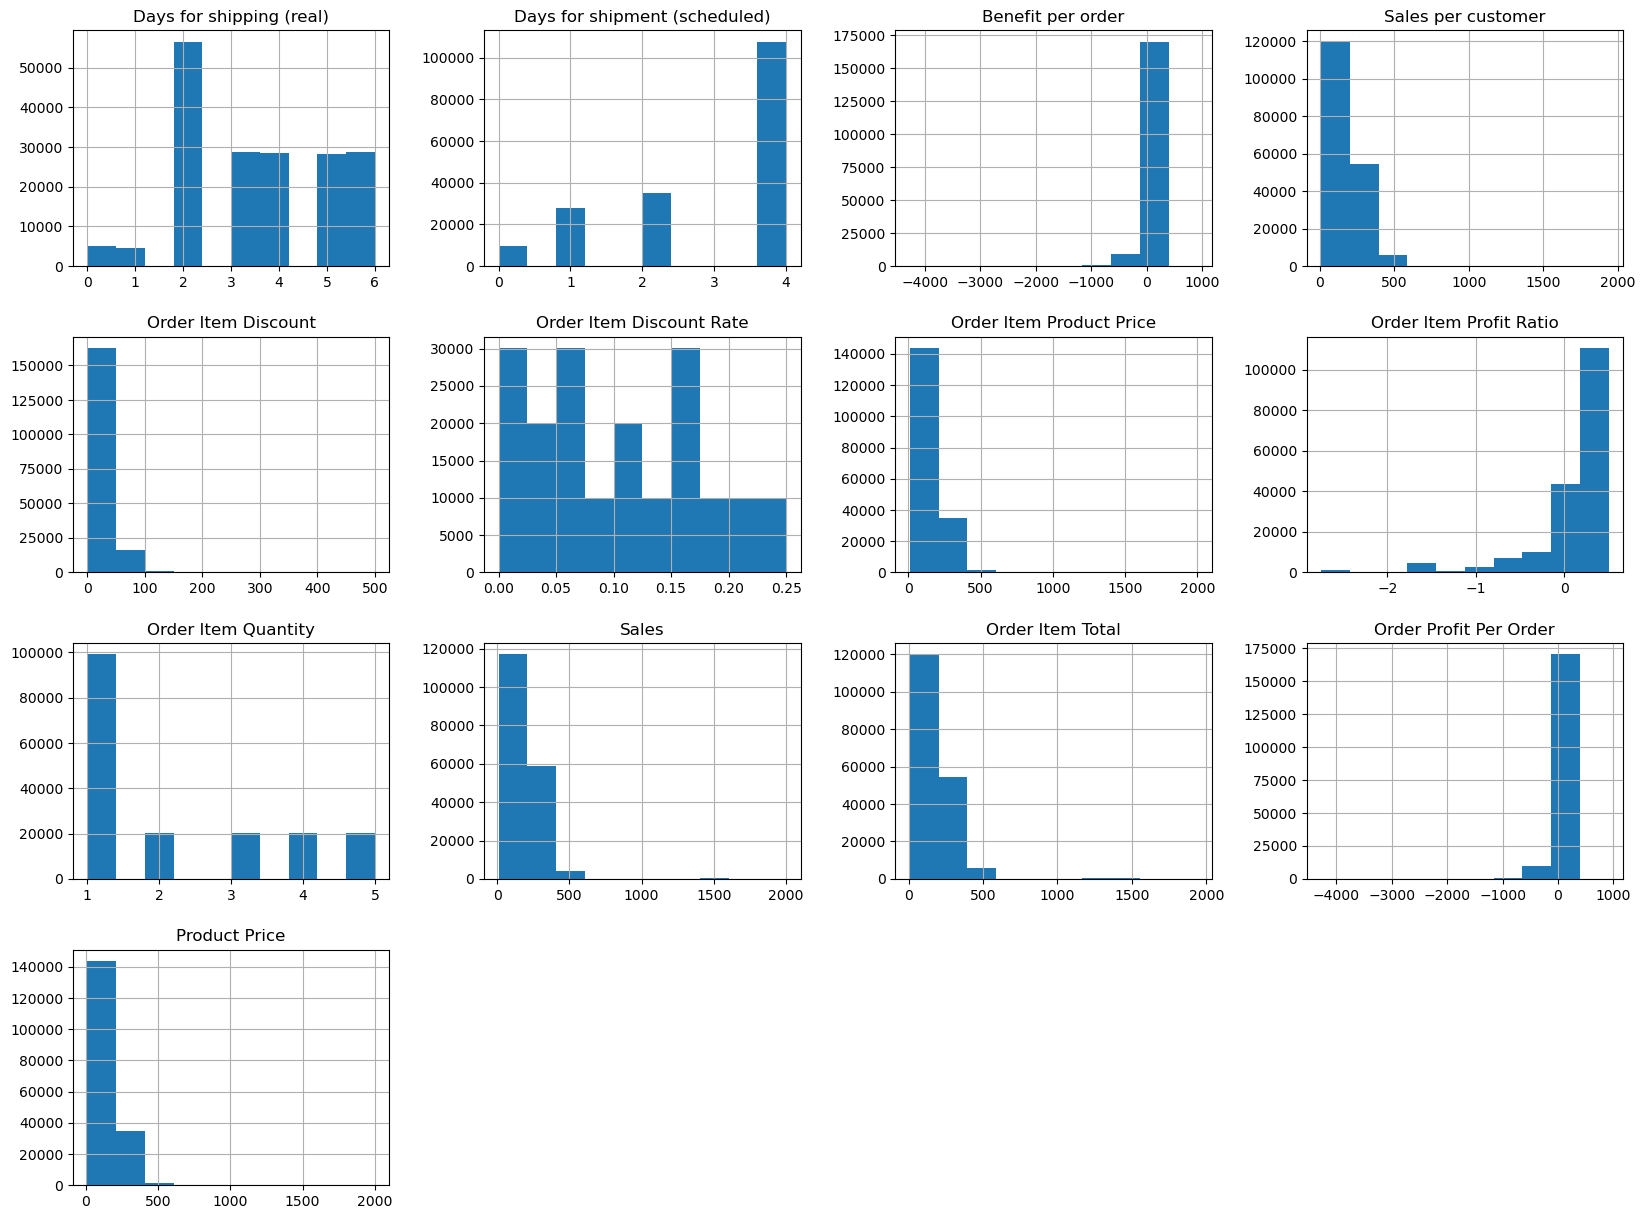

In [9]:
#Plotting histogram to analyse the distribution of some relevent numerical features
col=data[['Days for shipping (real)', 'Days for shipment (scheduled)','Benefit per order', 'Sales per customer',
       'Order Item Discount', 'Order Item Discount Rate','Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total','Order Profit Per Order','Product Price']]
col.hist(figsize=(20,15))
plt.show()

The maximum number of scheduled (promised) days is 4 which as well has the most counts, while the maximum number of real shipping days is 6 which shows lack of credibility and dishonesty with customers and emphasizes how serious this issue is.

The histogram of the product prices and sales variables are right skewed which means that most of the count density is concentrated in less-costed items.

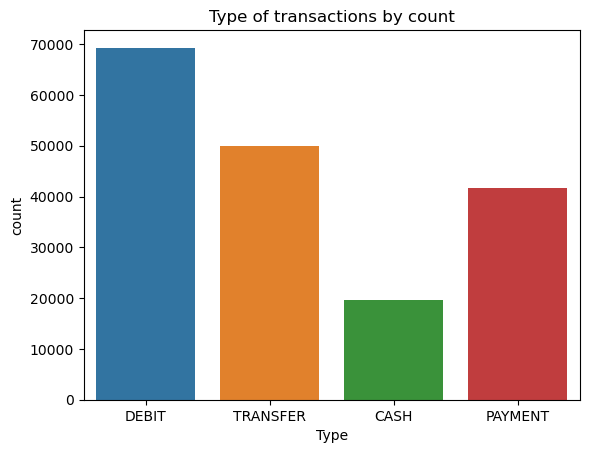

In [10]:
sns.countplot(x='Type',data=data)
plt.title('Type of transactions by count')
plt.show()

We can see that a huge majority of the customers go for the debit payment method.

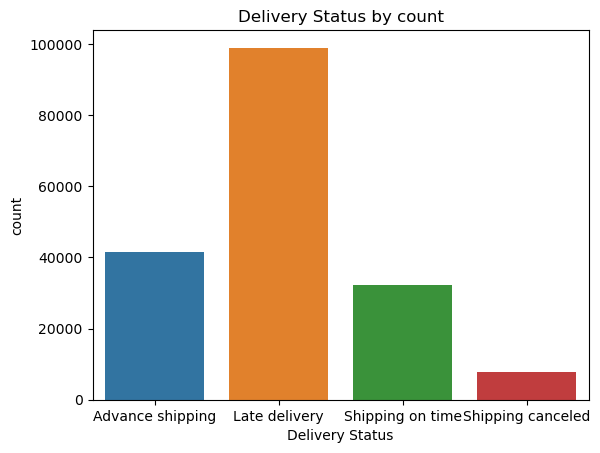

In [10]:
sns.countplot(x='Delivery Status',data=data)
plt.title('Delivery Status by count')
plt.show()

There is a high occurrence of late deliveries and only a small number of shipping were cancelled.

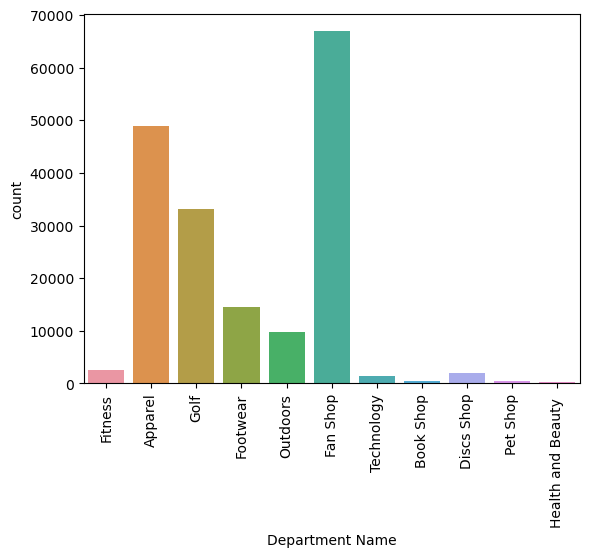

In [12]:
sns.countplot(x='Department Name',data=data)
plt.xticks(rotation=90)
plt.show()

'Fan Shop' seems to be a more popular department compared to other departments and 'Health and Beauty' is underrepresented in the dataset

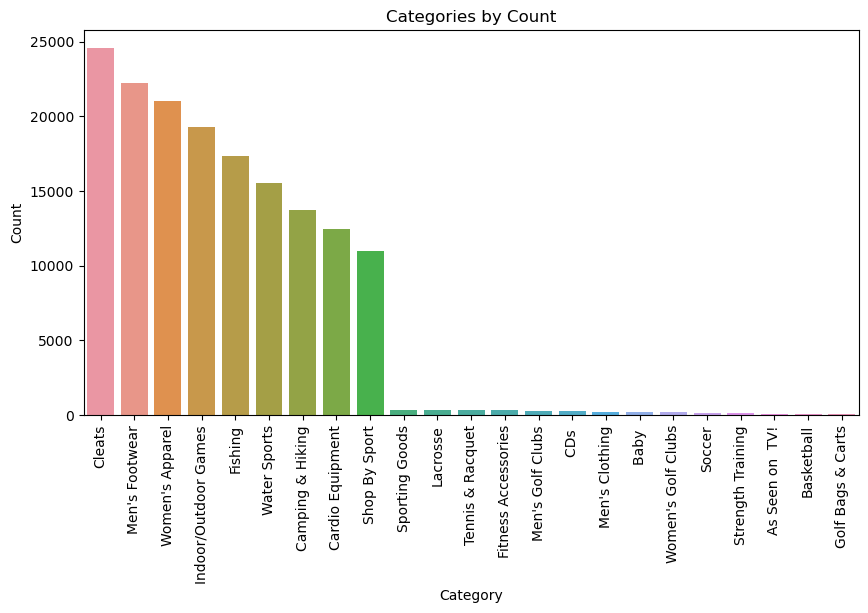

In [13]:
plt.figure(figsize = (10,5))
a = data['Category Name'].value_counts(ascending = False)
order = list(a.index[:9]) + list(a.index[-14:])
sns.countplot(data = data, x = 'Category Name', order = order)
plt.xticks(rotation = 90);
plt.title('Categories by Count')
plt.ylabel('Count');
plt.xlabel('Category');

It can be seen that most of the products delivered are from the categories 'Cleats' and 'Men's footwear'.

Text(0.5, 1.0, 'Top 20 Countries by Order')

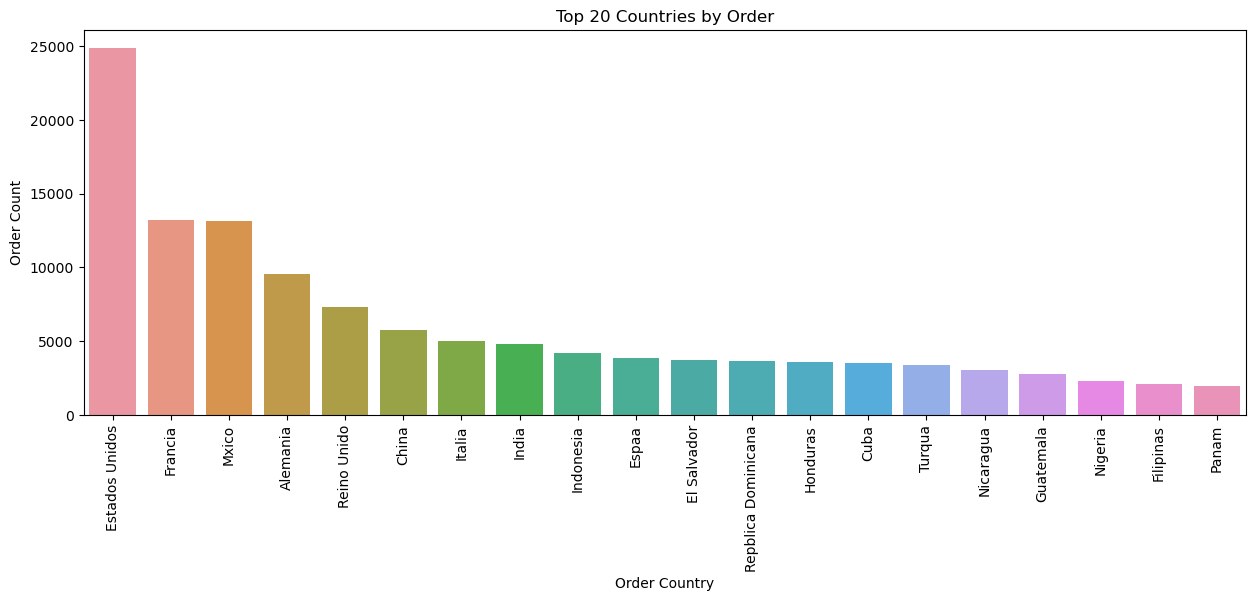

In [14]:
plt.figure(figsize = (15,5))
a = data['Order Country'].value_counts(ascending = False).head(22)
order = list(a.index[:4]) + list(a.index[6:])
sns.countplot(data = data, x = 'Order Country',order = order)
plt.xticks(rotation = 90);
plt.xlabel('Order Country');
plt.ylabel('Order Count');
plt.title('Top 20 Countries by Order')

Analyzing the top 20 countries by order,Estados Unidos has the highest number of orders and Panama has the least.

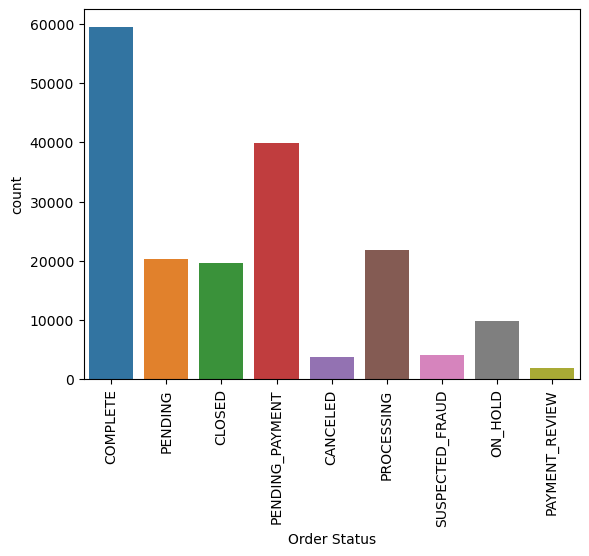

In [15]:
sns.countplot(x='Order Status',data=data)
plt.xticks(rotation=90)
plt.show()

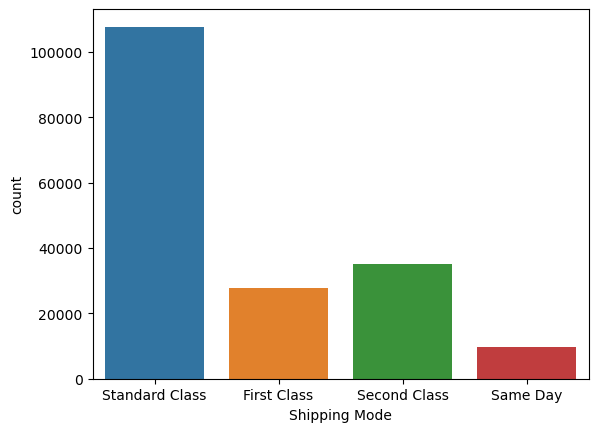

In [16]:
sns.countplot(x='Shipping Mode',data=data)
plt.show()

The countplot of the shipping modes shows that a larger number of customers prefer the default standard class type shipping mode.

<Axes: xlabel='Late_delivery_risk', ylabel='count'>

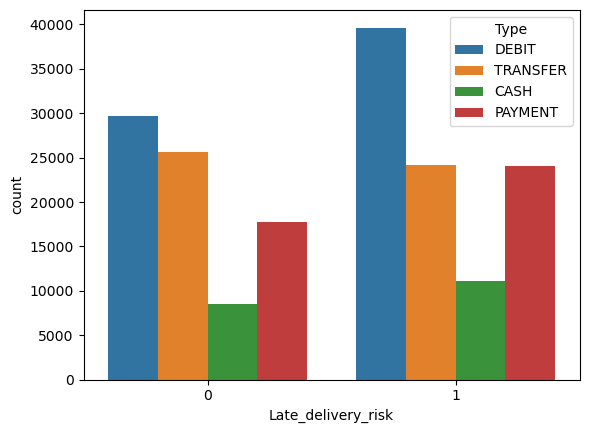

In [18]:
sns.countplot(x='Late_delivery_risk',data=data,hue='Type')

This shows higher late delivery risk for debit transactions.

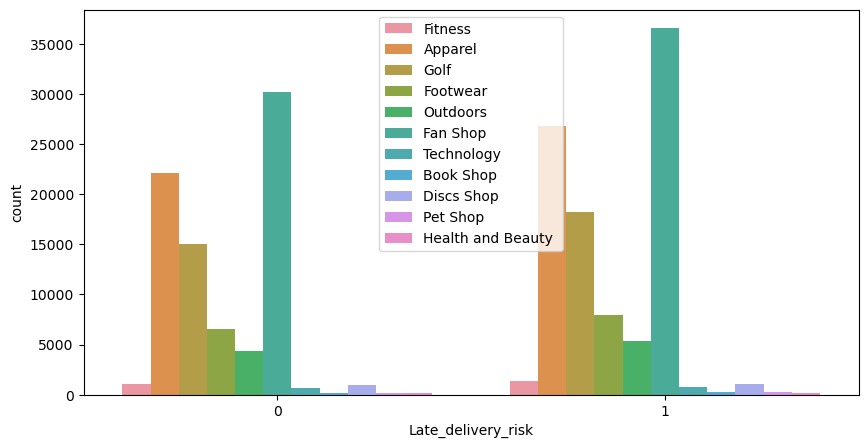

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x='Late_delivery_risk',data=data,hue='Department Name')
plt.legend(loc='upper center')


The department of fan shop has most late deliveries.

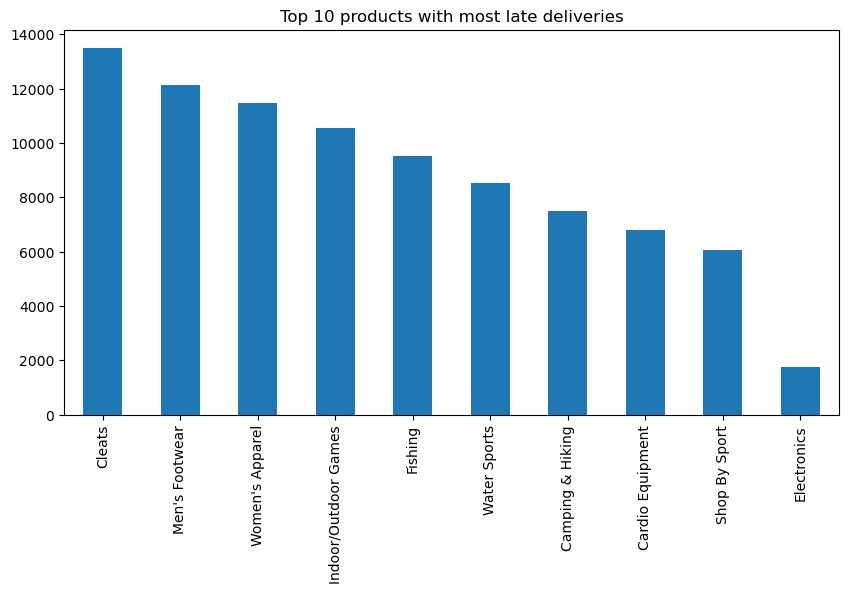

In [6]:
late_delivery = data[(data['Delivery Status'] == 'Late delivery')]
#Top 10 products with most late deliveries
late_delivery['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(10,5), 
                                                                title=('Top 10 products with most late deliveries'))
plt.show()

'Cleats' have most late deliveries and the category 'Electronics' has 10th position in terms of late deliveries.

<Axes: xlabel='Late_delivery_risk', ylabel='count'>

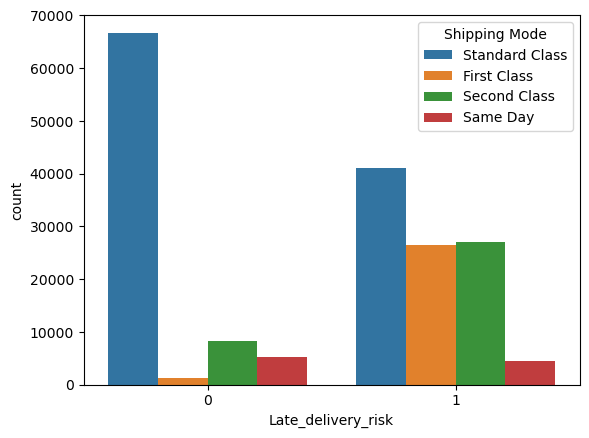

In [20]:
sns.countplot(x='Late_delivery_risk',data=data,hue='Shipping Mode')

Late_delivery_risk is recorded maximum for standard class shipping mode

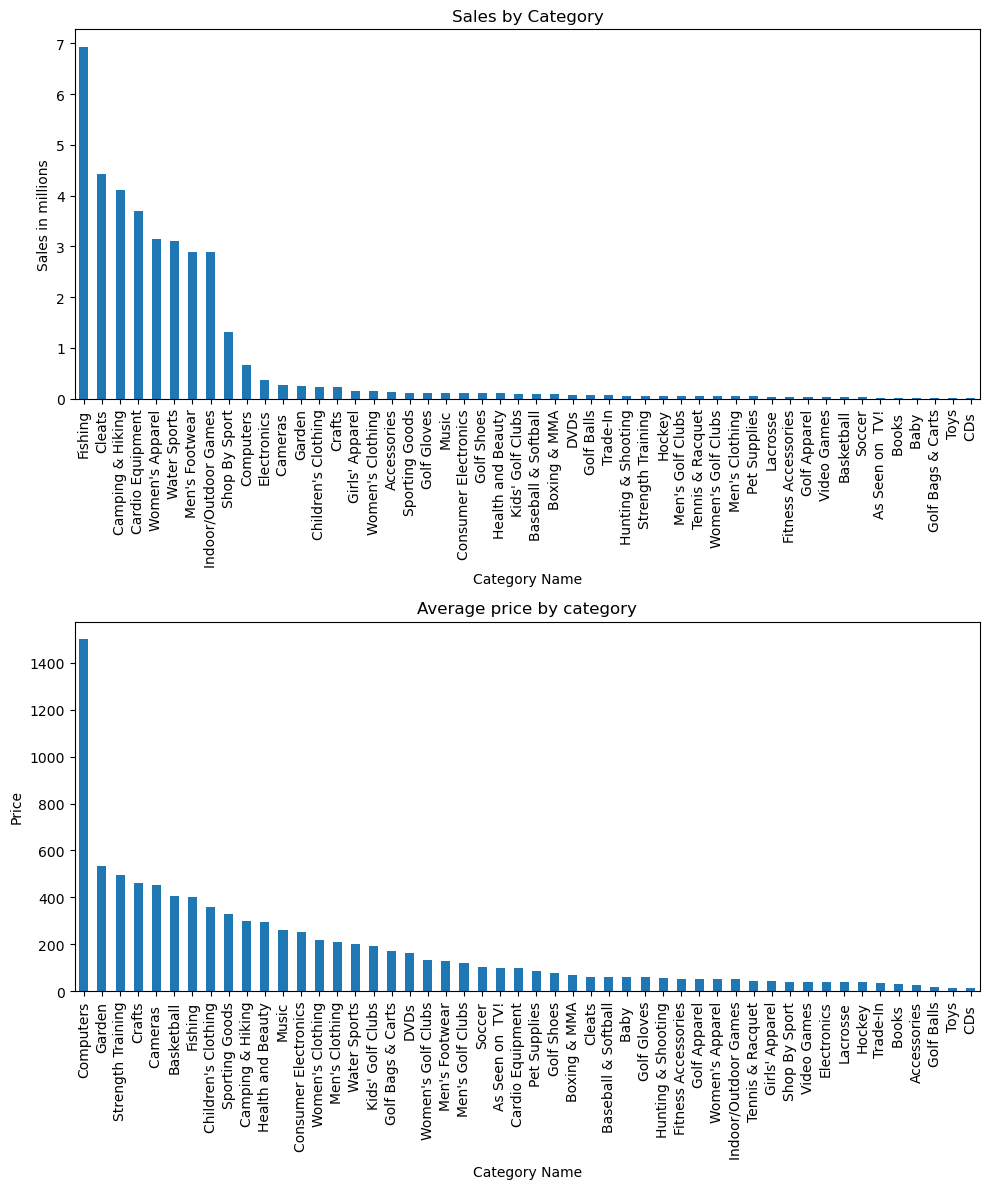

In [21]:
#Sales by product category
cat = data.groupby('Category Name')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
# Total sum of sales for all categories
cat['Sales'].sum().sort_values(ascending=False).plot.bar(ax=ax1)
ax1.set(title="Sales by Category", ylabel='Sales in millions', yticks=np.arange(0, 8e6, 1e6), yticklabels=np.arange(0, 8, 1))
# Mean prices for all categories
cat['Product Price'].mean().sort_values(ascending=False).plot.bar(ax=ax2)
ax2.set(title="Average price by category", ylabel='Price')
plt.tight_layout()
plt.show()


Fishing category had most number of sales followed by the Cleats.
As for the average product prices, Computers leads the numbers followed by Garden equipment.

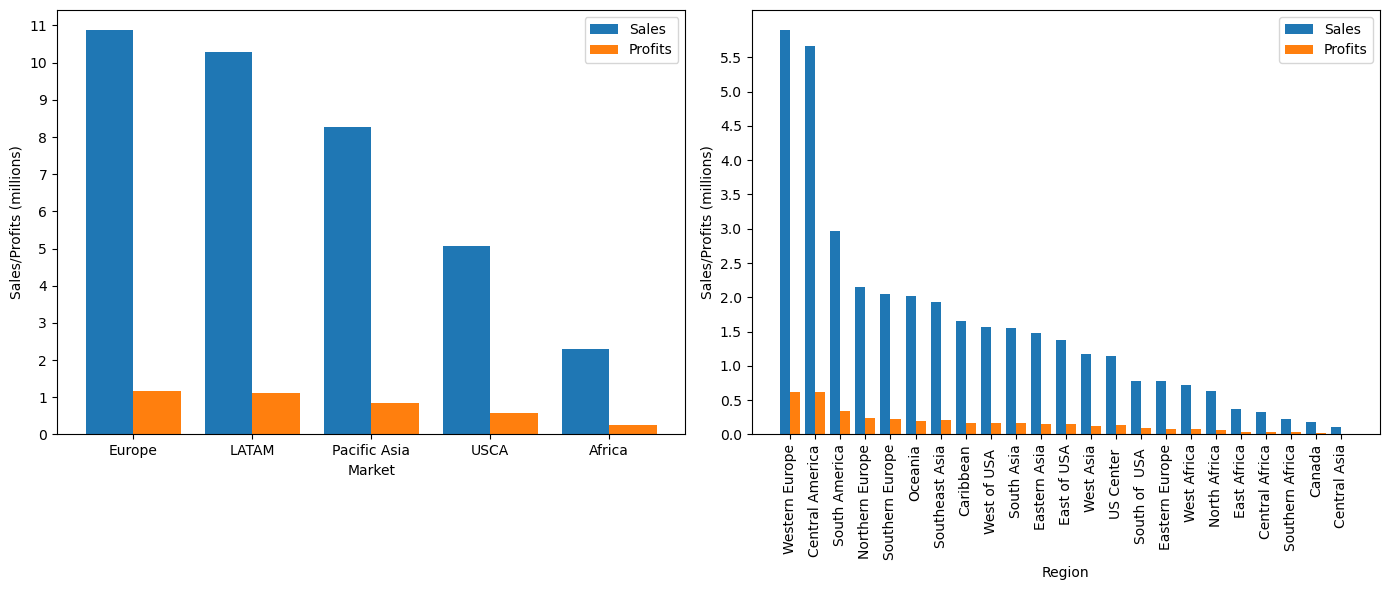

In [22]:
#Sales/Profit by Continent and Sales/Profit by Region:
market = data.groupby('Market')
region = data.groupby('Order Region')
# Sales and Profits by Market plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
markets = market['Sales'].sum().sort_values(ascending=False).index
ticks = np.arange(len(markets))
bar_width = 0.4
ax1.bar(ticks, market['Sales'].sum().reindex(markets), width=bar_width, label='Sales')
ax1.bar(ticks+bar_width, market['Benefit per order'].sum().reindex(markets), width=bar_width, label='Profits')
ax1.set(label='Sale and Profit by Market', xlabel='Market', ylabel='Sales/Profits (millions)', xticks=ticks+bar_width/2, 
        xticklabels=markets, yticks=np.arange(0, 12e6, 1e6), yticklabels=np.arange(0, 12, 1))
ax1.legend()
# Sales and Profits by Region plot
regions = region['Sales'].sum().sort_values(ascending=False).index
ticks = np.arange(len(regions))
bar_width = 0.4
ax2.bar(ticks, region['Sales'].sum().reindex(regions), width=bar_width, label='Sales')
ax2.bar(ticks+bar_width, region['Benefit per order'].sum().reindex(regions), width=bar_width, label='Profits')
ax2.set(label='Sale and Profit by Region', xlabel='Region', ylabel='Sales/Profits (millions)', xticks=ticks+bar_width/2, 
        yticks=np.arange(0, 6e6, 0.5e6), yticklabels=np.arange(0, 6, 0.5))
ax2.set_xticklabels(regions, rotation=90)
ax2.legend()
#region['Sales'].sum().sort_values(ascending=False).plot.bar(title="Total sales for all regions", ax=ax2)
plt.legend()
plt.tight_layout()
plt.show()

It can be seen from the graph that European market has the most number of sales followed by Latin America whereas Africa has the least. In these markets western europe regions and central america recorded highest sales.

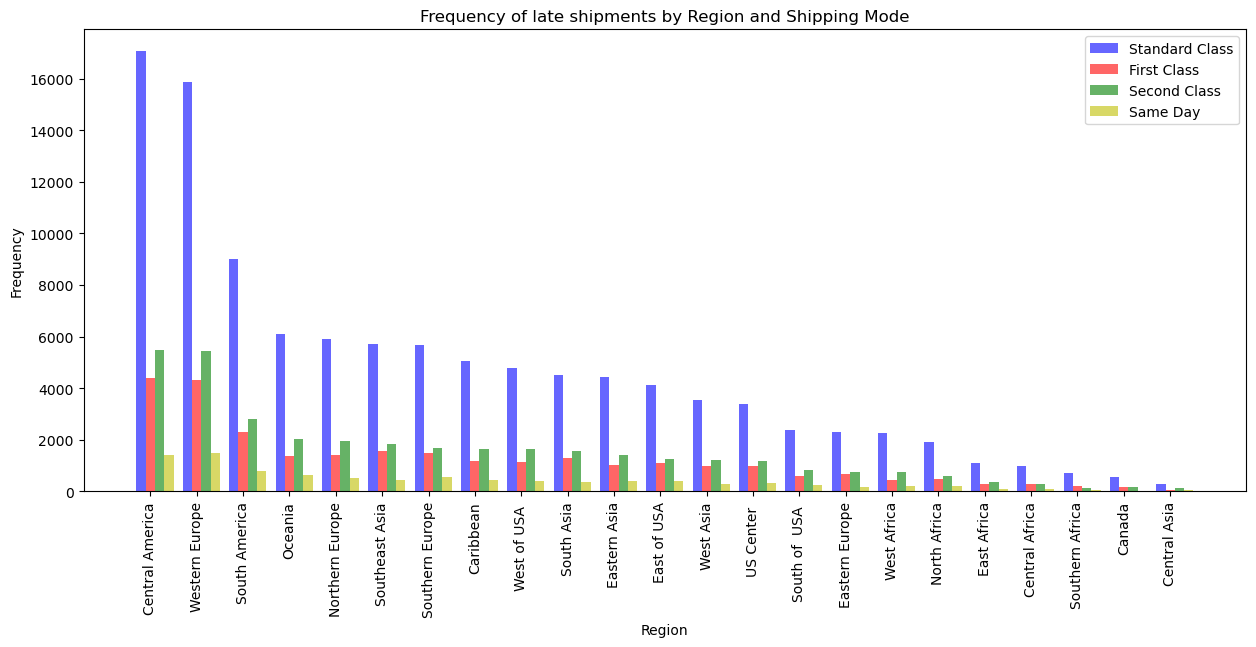

In [7]:
index = data.groupby('Order Region').count()['Sales'].sort_values(ascending=False).index
ticks = np.arange(len(index))

ship_data = data.groupby(['Shipping Mode', 'Order Region']).count()['Sales']
bar_width=0.2
opacity=0.6

# Plotting late deliveries by Shipping mode and region
fig,ax = plt.subplots(figsize=(15,6))
ax.bar(ticks, ship_data['Standard Class'].reindex(index), bar_width, alpha=opacity, color='b',
       label='Standard Class')
ax.bar(ticks+bar_width, ship_data['First Class'].reindex(index), bar_width, alpha=opacity, color='r',
       label='First Class')
ax.bar(ticks+2*bar_width, ship_data['Second Class'].reindex(index), bar_width, alpha=opacity, color='g',
       label='Second Class')
ax.bar(ticks+3*bar_width, ship_data['Same Day'].reindex(index), bar_width, alpha=opacity, color='y',
       label='Same Day')
ax.set(title='Frequency of late shipments by Region and Shipping Mode', xlabel='Region', ylabel='Frequency',
      xticks=ticks+bar_width)
ax.set_xticklabels(index, rotation=90)
ax.legend()
plt.show()

The maximum number of late deliveries is in 'Standard Class' Shipping mode followed by 'Second Class' and 'First Class' which are close in terms of late deliveries.And for the the Central America has the highest late deliveries followed by Western Europe.

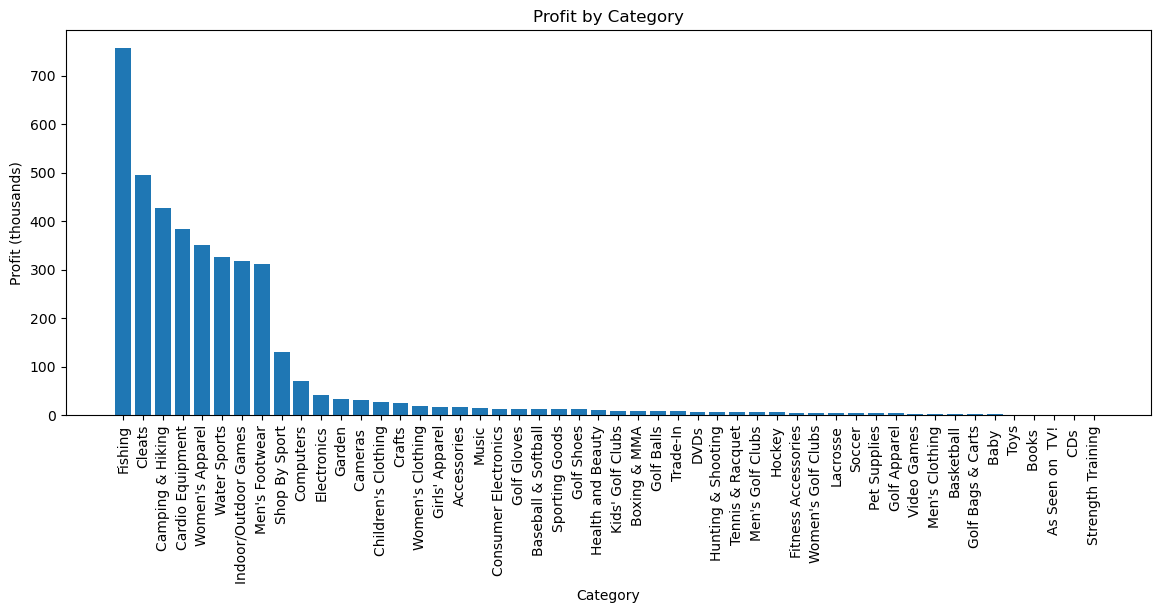

In [8]:
# Profit by Category
profit_cat = data.groupby('Category Name')['Benefit per order'].sum().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(14, 5))
ax.bar(np.arange(len(profit_cat)), profit_cat)
ax.set(title='Profit by Category', xlabel='Category', ylabel='Profit (thousands)', yticklabels=np.arange(0, 800, 100),
      xticks=np.arange(len(profit_cat)))
ax.set_xticklabels(profit_cat.index, rotation=90)
plt.show()

We can see that 'Fishing' category gives maximum profit followed by 'Cleats' and 'Strength Training' category gives the least profit.

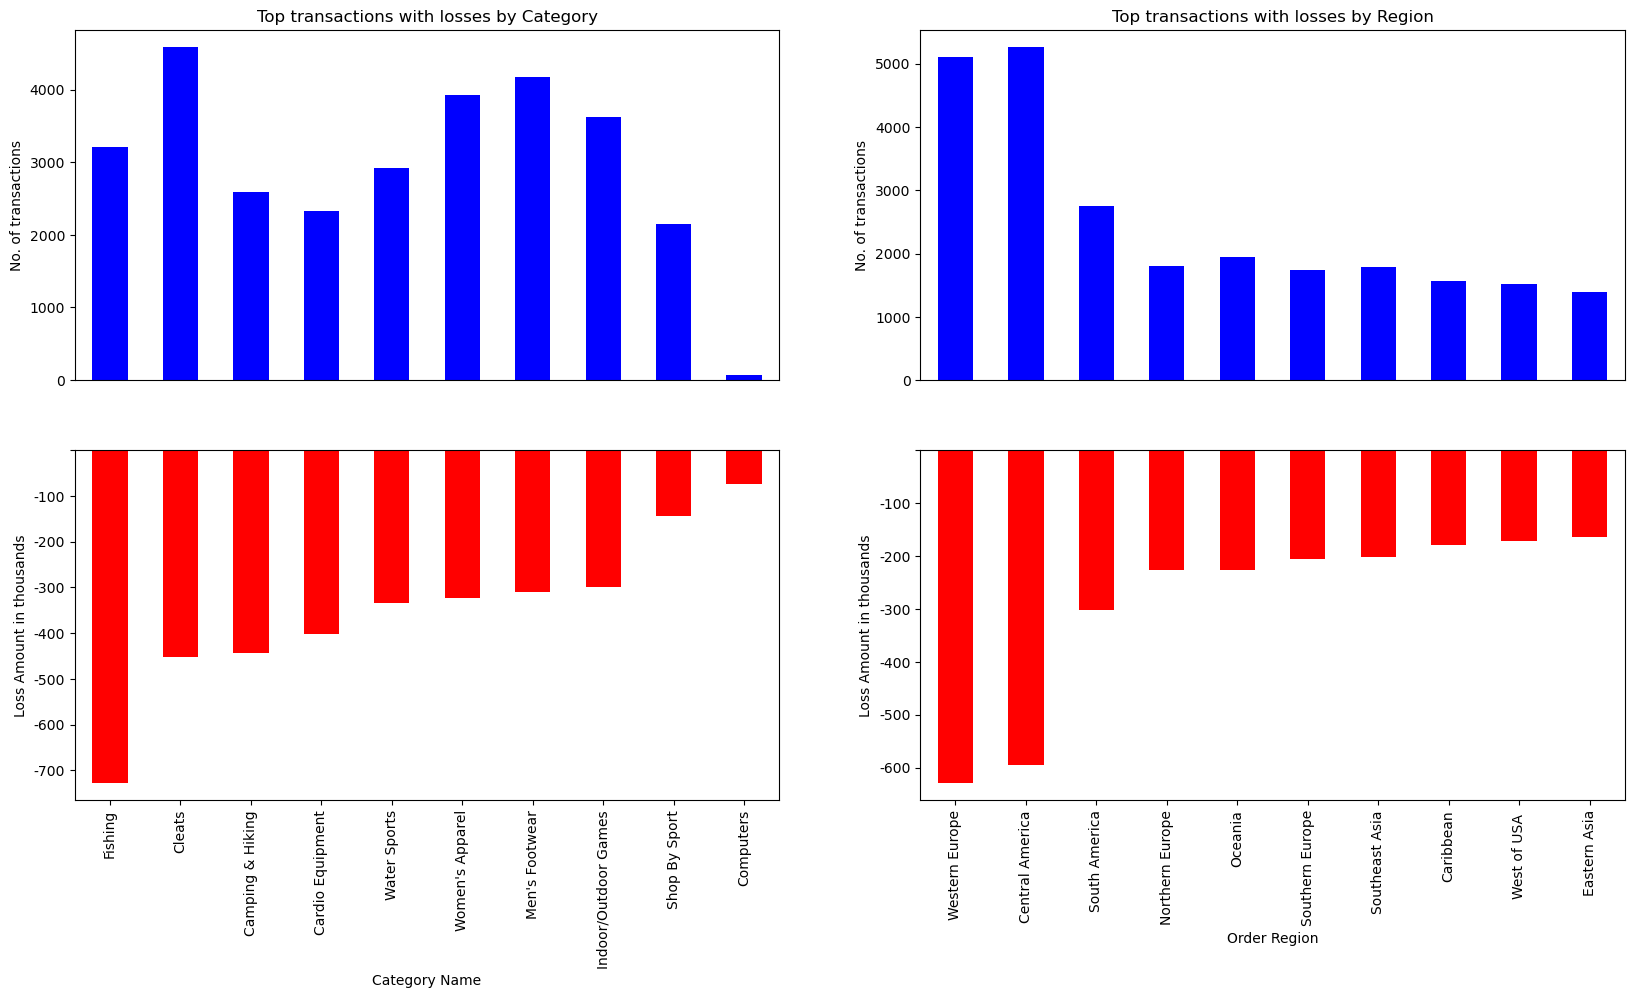

Total losses recorded: -3883547


In [9]:
loss = data[data['Benefit per order']<0]

#Plotting top 10 products with most loss
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
axs = axs.flat
max_loss_cat = loss.groupby('Category Name').sum()['Benefit per order'].nsmallest(10)
loss['Category Name'].value_counts()[max_loss_cat.index].plot.bar(ax=axs[0], color='b')
max_loss_cat.plot.bar(ax=axs[2], color='r')
axs[0].set(title='Top transactions with losses by Category', ylabel='No. of transactions')
axs[0].xaxis.set_visible(False)
axs[2].set(ylabel='Loss Amount in thousands', yticklabels=np.arange(-800, 0, 100))

# Plotting top 10 Regions with max losses
max_loss_reg = loss.groupby('Order Region').sum()['Benefit per order'].nsmallest(10)
loss['Order Region'].value_counts()[max_loss_reg.index].plot.bar(ax=axs[1], color='b')
max_loss_reg.plot.bar(ax=axs[3], color='r')
axs[1].set(title='Top transactions with losses by Region', ylabel='No. of transactions')
axs[1].xaxis.set_visible(False)
axs[3].set(ylabel='Loss Amount in thousands', yticklabels=np.arange(-700, 0, 100))
plt.show()
print('Total losses recorded: %d'%loss['Benefit per order'].sum())

The total loss sales are approximately 3.9 Millions which is an huge amount.

It can be seen that Cleats is the category with maximum frequency of loss generating transactions followed by Mens footwear. Fishing records the highest amount lost in loss generating transactions, few while ago we saw that fishing contributes to maximum profit. Most lost sales are happeing in Western Europe & Central America region.


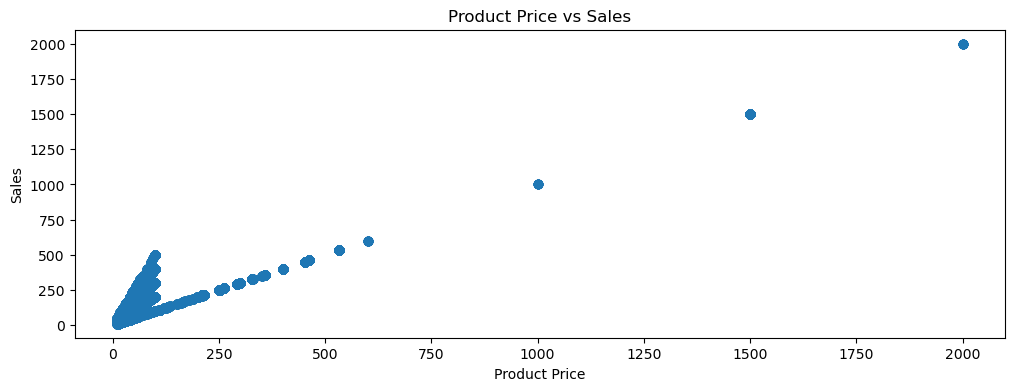

In [12]:
fig, ax = plt.subplots(1,figsize=(12, 4))
plt.scatter(x=data['Product Price'], y=data['Sales'])
ax.set(title='Product Price vs Sales', xlabel='Product Price', ylabel='Sales')
plt.show()

From the slope of the scatter plot we can observe that products with less price have more sales.


# Checking Correlation

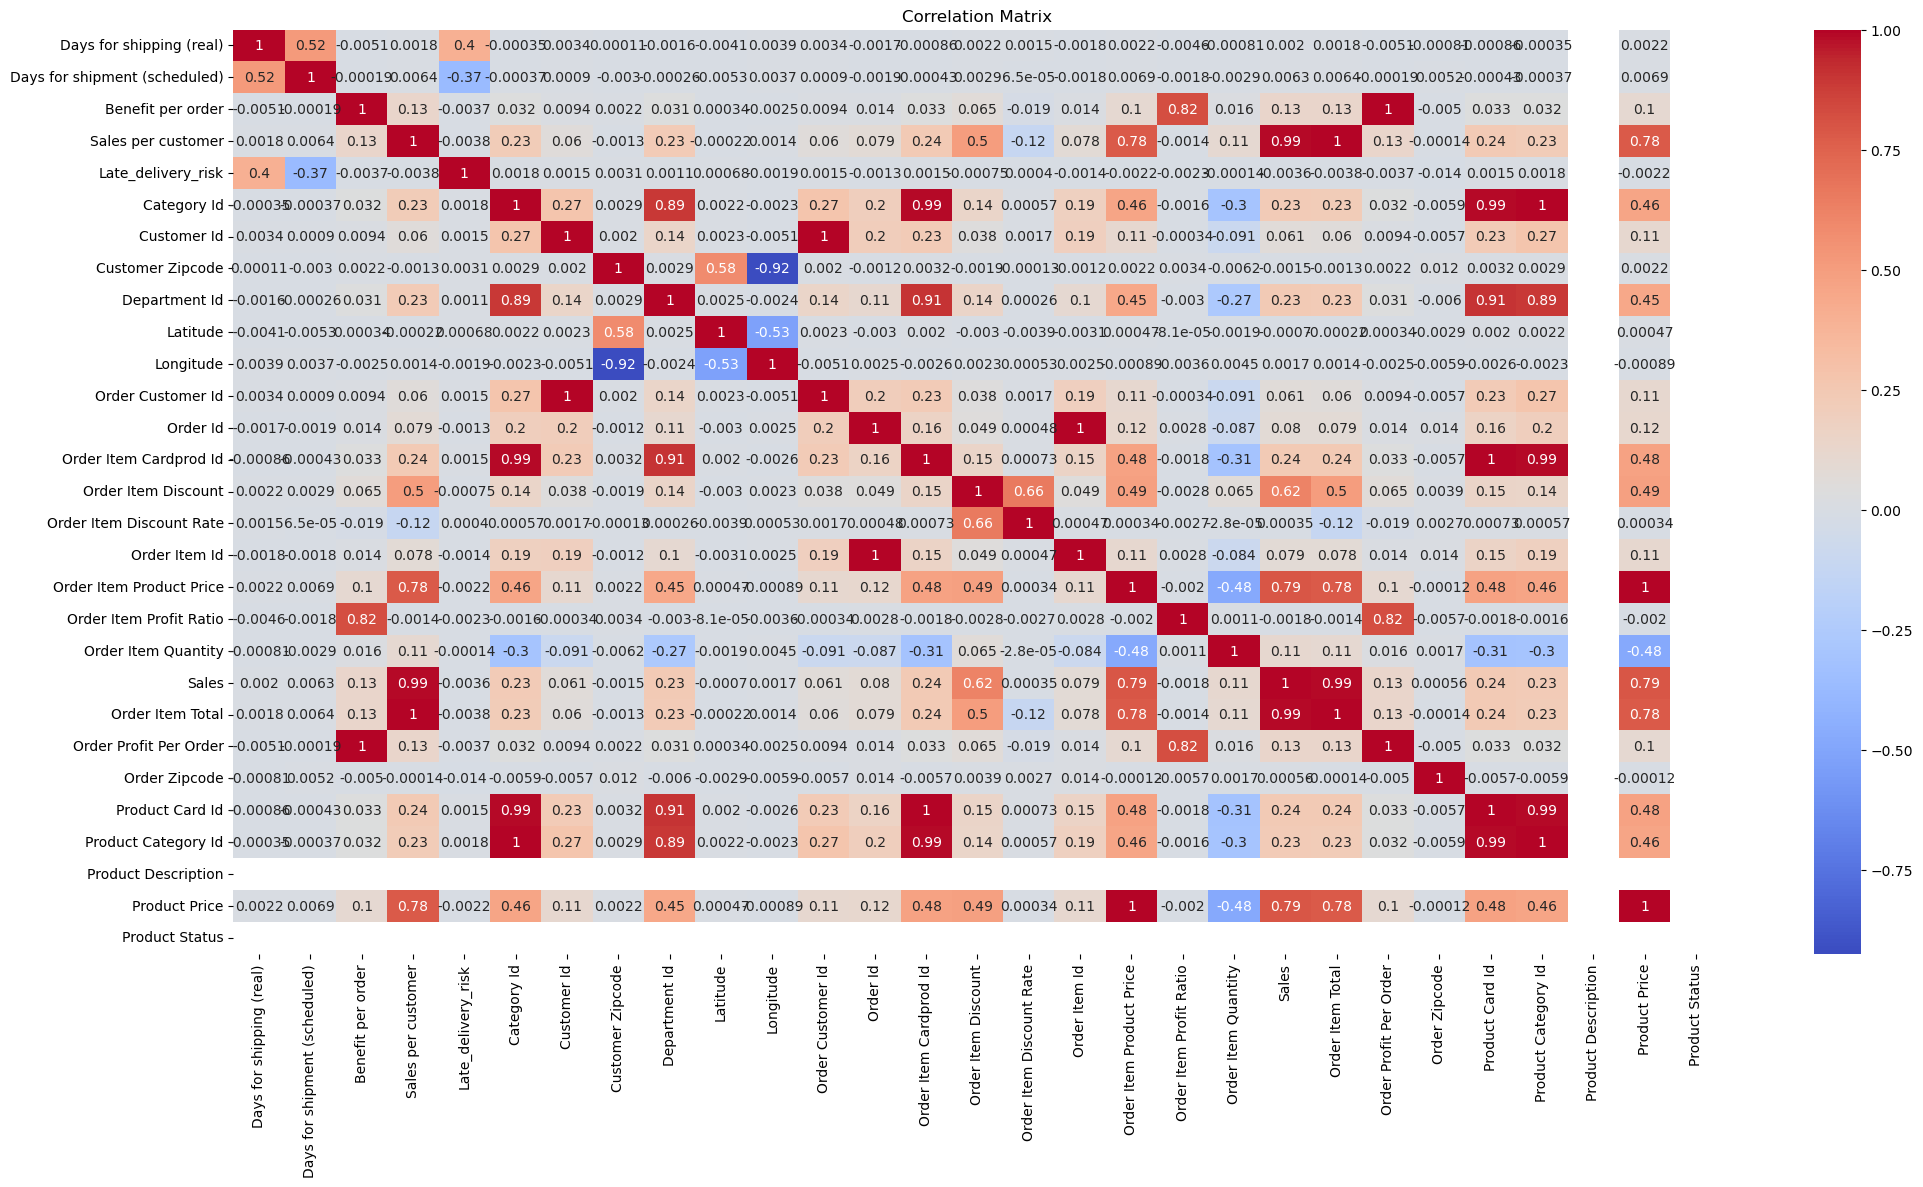

In [14]:
plt.figure(figsize=(24,12))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Sales and Discount, Sales and Order Item Total are highly positively corelated, whereas Product price and Quantity ordered are negatively corelated.

From the heatmap we understand that there are a lot of duplicate columns

# DATA PREPROCESSING

# Missing Value Detection

In [11]:
#Checking for null values
data.isna().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


There are missing values in 'Customer Lname','Customer Zipcode','Order Zipcode' and 'Product Description'.Since these columns are not relevent for our problem,we drop them.

In [12]:
#Removing columns having null values
data=data.drop(['Customer Lname','Customer Zipcode','Order Zipcode','Product Description'],axis=1)

In [5]:
#Removing duplicate and unwanted columns that were identified in heatmap
data=data.drop(['Sales per customer','Category Id','Customer Email','Customer Fname','Customer Id', 'Customer Password', 
              'Customer Street','Department Id','Latitude','Longitude','Order Customer Id',
              'Order Id', 'Order Item Cardprod Id','Order Item Id','Order Profit Per Order',
              'Product Card Id', 'Product Category Id','Product Image','Order Item Product Price',
              'Product Status','Delivery Status'],axis=1)

# Outlier Detection

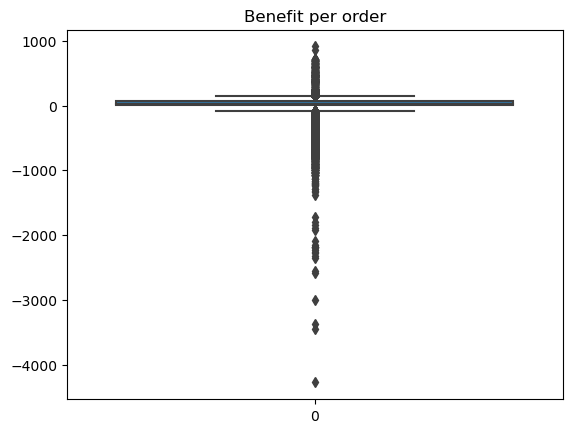

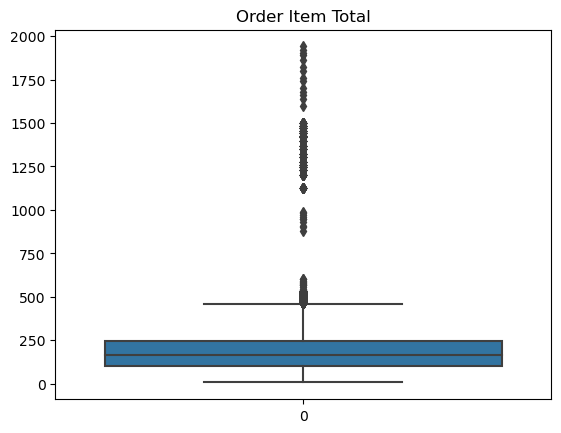

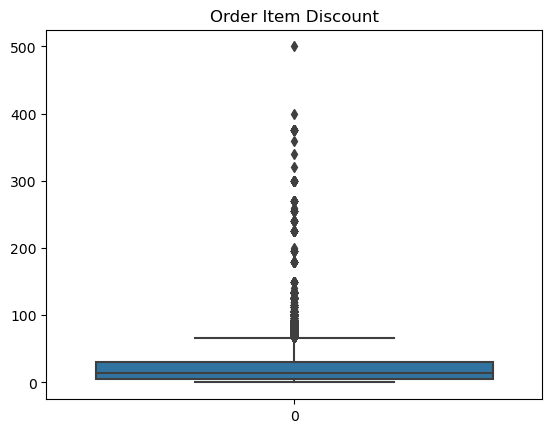

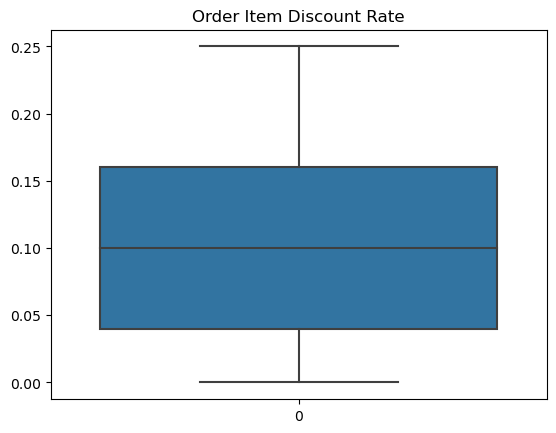

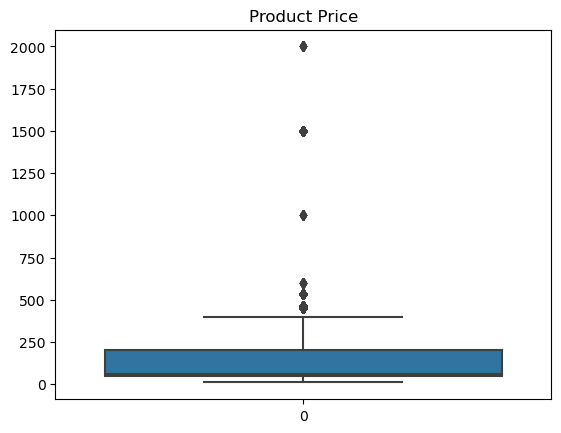

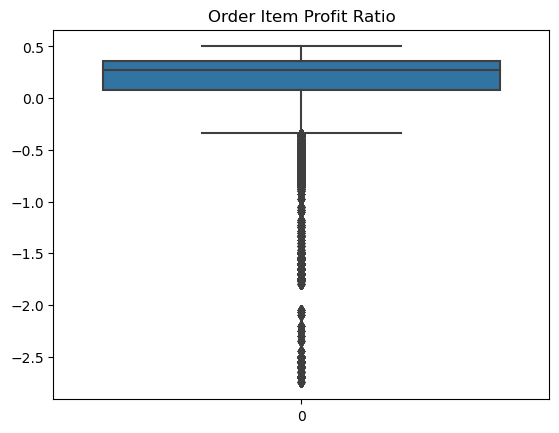

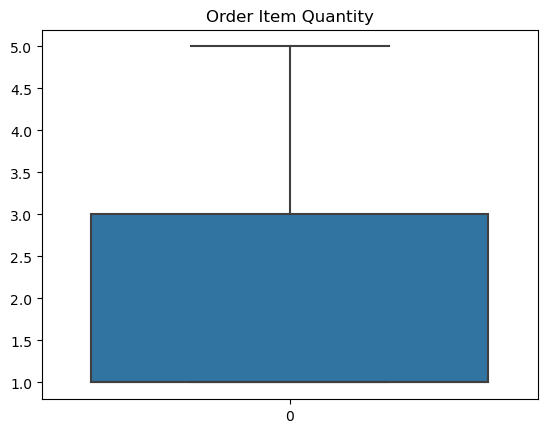

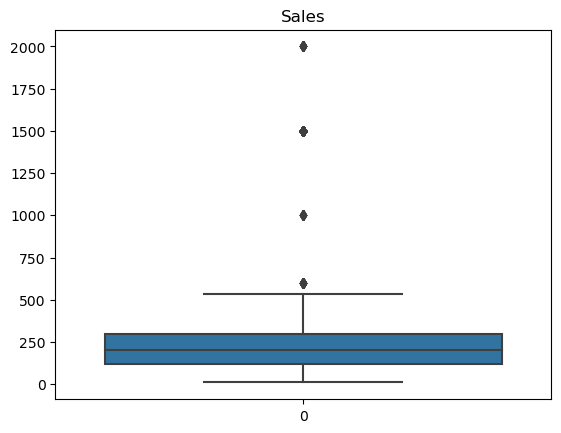

In [14]:
col=['Benefit per order', 'Order Item Total','Order Item Discount','Order Item Discount Rate','Product Price',
     'Order Item Profit Ratio','Order Item Quantity', 'Sales']
for i in col:
    plt.figure()
    sns.boxplot(data[i])
    plt.title(i)
plt.show()

There are many outliers in Benefit per order', 'Order Item Total','Order Item Discount','Product Price',
     'Order Item Profit Ratio' and'Sales'.Since these columns are related to price,sales,profit etc they are natural outliers which are not caused due to any errors and so they cannot be removed.

# Feature Engineering

In [15]:
#Addition of features
from datetime import datetime as dt
data["order date (DateOrders)"] = pd.to_datetime(data["order date (DateOrders)"])
data['Order date']=data["order date (DateOrders)"].dt.day
data["order year"] = data["order date (DateOrders)"].dt.year
data["order month"] = data["order date (DateOrders)"].dt.month
data["order day of the week"] = data["order date (DateOrders)"].dt.weekday
data["is weekend"] = data["order day of the week"] > 4
data["order hour"] = data["order date (DateOrders)"].dt.hour

data['Is_Late'] = np.where(data['Days for shipping (real)'] > data['Days for shipment (scheduled)'],'YES','NO')

In [16]:
data=data.drop(['order date (DateOrders)','shipping date (DateOrders)','Late_delivery_risk','Days for shipping (real)', 
                'Days for shipment (scheduled)'],axis=1)

# Encoding

In [17]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label_encoders={}
to_encode=['Type','Category Name','Customer City','Customer Country','Customer Segment','Customer State','Department Name',
          'Market','Order City','Order Country','Order Region','Order State','Order Status','Product Name','Shipping Mode','is weekend']
for col in to_encode:
    data[col]=le.fit_transform(data[col])
    label_encoders[col]=dict(zip(le.classes_,le.transform(le.classes_)))

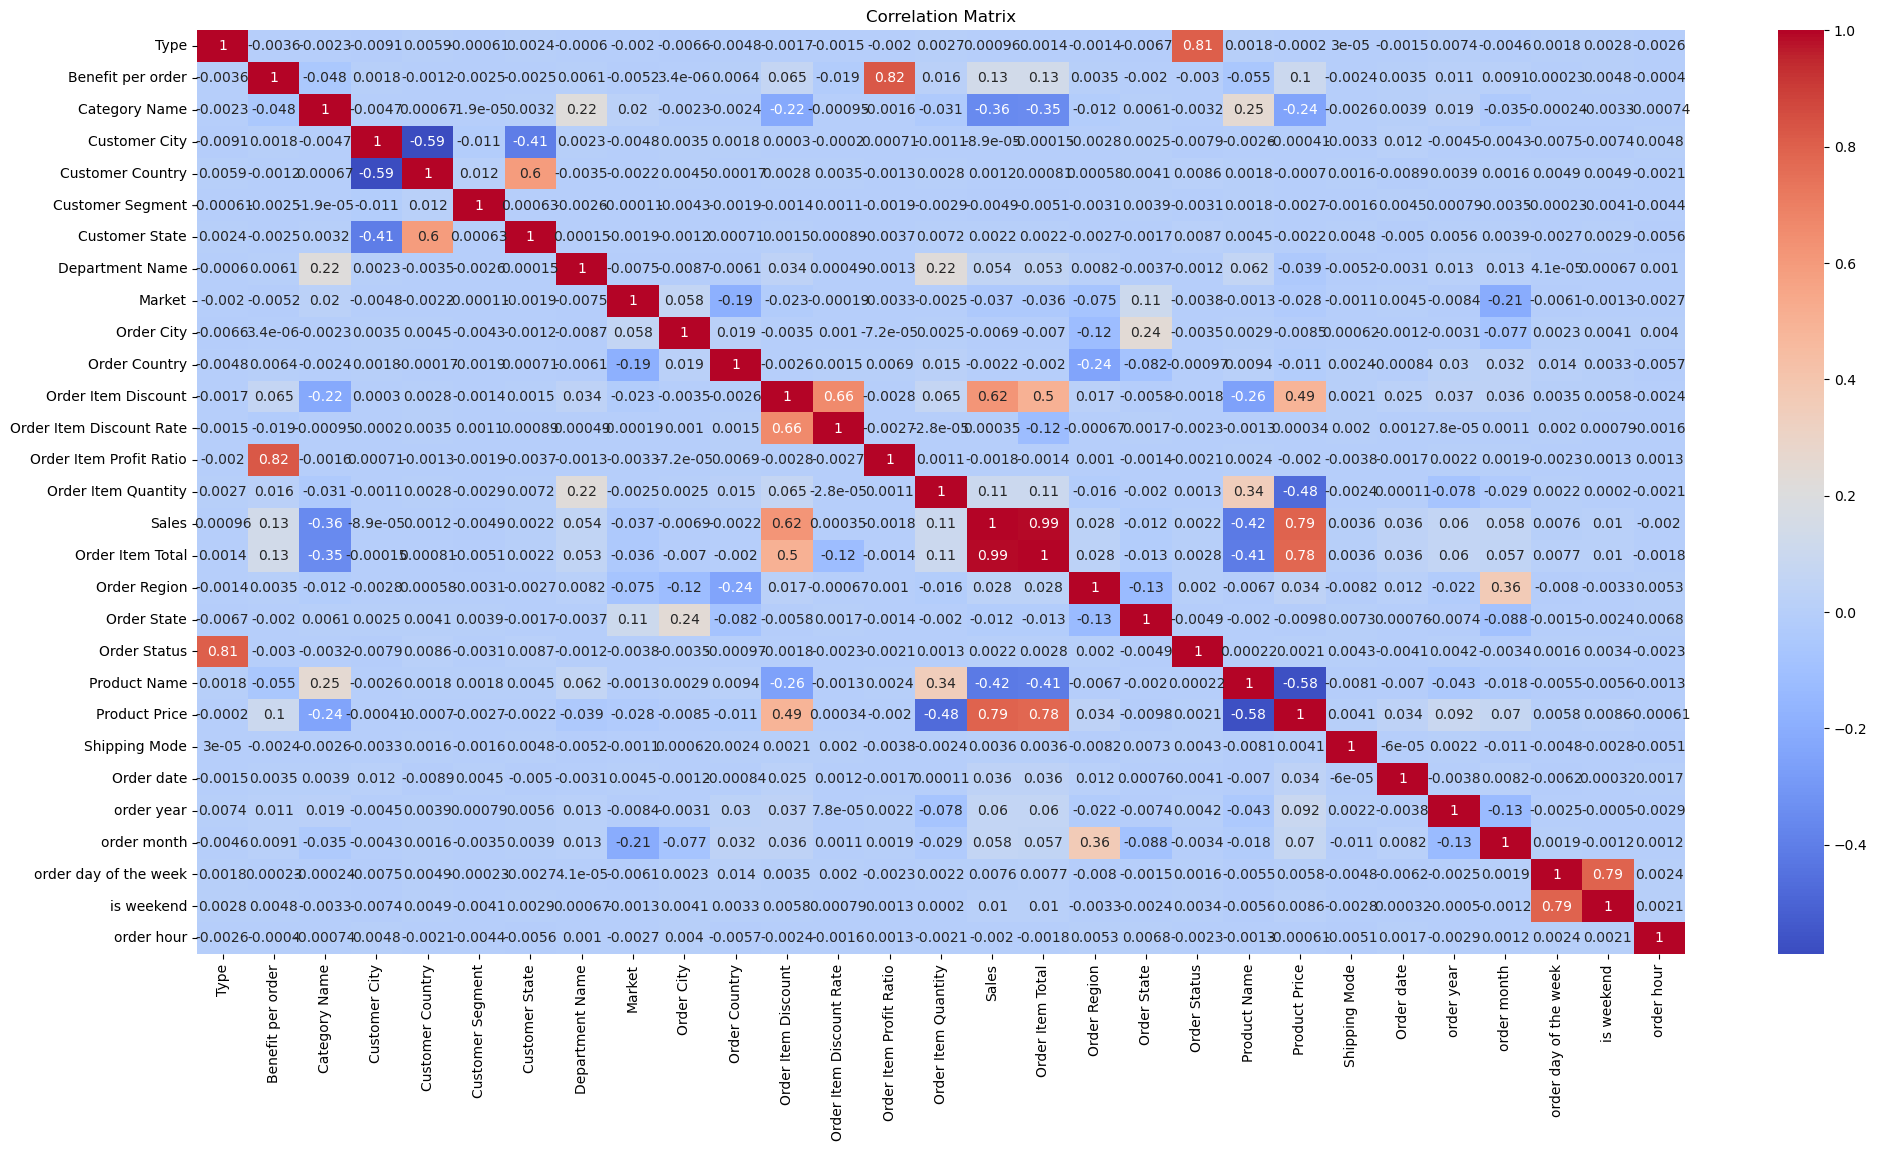

In [18]:
plt.figure(figsize=(24,12))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [19]:
#Finding highly correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [20]:
corr_features = correlation(data, 0.6)
len(set(corr_features))

7

In [21]:
corr_features

{'Order Item Discount Rate',
 'Order Item Profit Ratio',
 'Order Item Total',
 'Order Status',
 'Product Price',
 'Sales',
 'is weekend'}

In [22]:
#Dropping one from each pair of highly correlated features
data=data.drop(['Order Status','Order Item Profit Ratio','Order Item Discount Rate','Sales','Order Item Total',],axis=1)

# Feature Selection

In [23]:
x=data.drop(['Is_Late'],axis=1)
y=data['Is_Late']

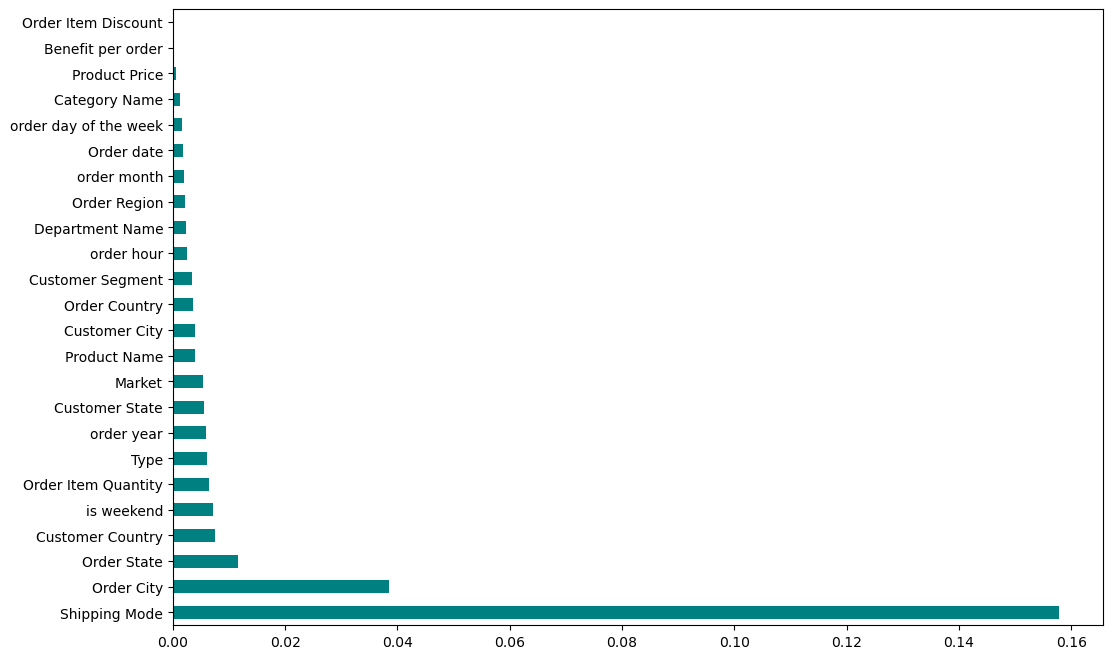

In [16]:
from sklearn.feature_selection import mutual_info_classif
importances=mutual_info_classif(x,y)
feat_importances=pd.Series(importances,data.columns[0:len(data.columns)-1]).sort_values(ascending=False)
plt.figure(figsize = (12,8))
feat_importances.plot(kind='barh',color='teal')
plt.show()

Selected features for building classification models are 'Shipping Mode','Customer Country','is weekend','Order Item Quantity','Type','order year','Customer State','Market','Order Country','Customer Segment','order hour','Department Name','Order Region', 'order month','Order date','order day of the week','Category Name','Product Price'

# BUILDING CLASSIFICATION MODELS

# Defining the dependent and independent variables

In [24]:
x=data[['Type','Category Name','Customer Country','Customer Segment','Customer State','Department Name','Market',
       'Order Country','Order Item Quantity','Order Region','Product Price','Shipping Mode',
       'order year', 'order month','Order date',
       'order day of the week', 'is weekend', 'order hour']]
y=data['Is_Late']

In [25]:
#Standardizing the features
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
X=std_scaler.fit_transform(x)
X=pd.DataFrame(x)

# Splitting the data into train data and test data

In [26]:
#Splitting the data in such a way that 80% data is for training and 25% is for testing
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

# LOGISTIC REGRESSION

# Model Training

In [27]:
#Defining and training(fitting) the logistic regression model using train data
from sklearn import linear_model
lr=linear_model.LogisticRegression()
lr_model=lr.fit(x_train,y_train)

In [28]:
#Predicting the output for the test data using the fitted model
lr_pred=lr_model.predict(x_test)

# Model Evaluation

In [29]:
print("Confusion matrix : \n",confusion_matrix(y_test,lr_pred))

Confusion matrix : 
 [[12947  2452]
 [ 8639 12066]]


In [30]:
#Evaluating the model using the metric accuracy score
lr_acc=accuracy_score(y_test,lr_pred)
print("Accuracy score :",lr_acc)

Accuracy score : 0.6928041214269887


# K-NEAREST NEIGHBORS

In [31]:
from sklearn.neighbors import KNeighborsClassifier

#To choose the best value for K by finding the accuracy scores of the model for K values ranging from 3 to 14
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)
print("Accuracy scores for K values ranging from 3 to 14 : \n",metric_k)

Accuracy scores for K values ranging from 3 to 14 : 
 [0.5797972523820075, 0.5525149567914912, 0.5755871925548416, 0.5527365388876578, 0.5710170618214049, 0.5532074008420119, 0.5686073565255927, 0.5559217815200532, 0.5682749833813427, 0.5565865278085531, 0.5691059162419676, 0.5581376024817195]


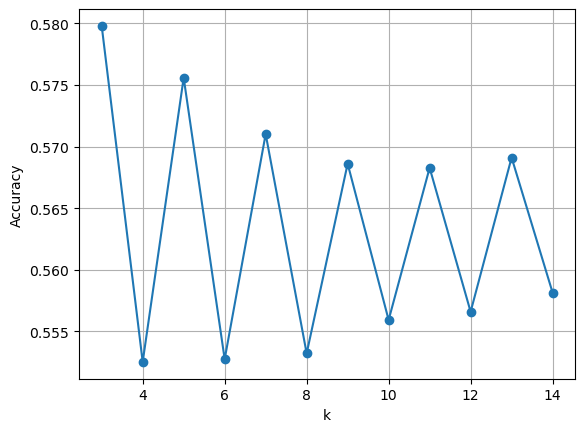

In [32]:
#Plotting the accuracy scores to find the best K value
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel("Accuracy")
plt.grid()

# Model Training

In [34]:
#Defining and training(fitting) the KNN model with K=3 using train data
classifier=KNeighborsClassifier(n_neighbors=3,metric='euclidean')
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [35]:
#Predicting the output for the test data using the fitted model
y_pred=classifier.predict(x_test)

# Model Evaluation

In [36]:
#Evaluating the model using confusion matrix
print("Confusion matrix : \n",confusion_matrix(y_test,y_pred))

Confusion matrix : 
 [[ 7758  7641]
 [ 7530 13175]]


In [37]:
#Evaluating the model using the metric accuracy score
knn_acc=accuracy_score(y_test,y_pred)
print("Accuracy score :",knn_acc)

Accuracy score : 0.5797972523820075


# SUPPORT VECTOR MACHINE( with Linear Kernel)

# Model Training

In [38]:
#Defining and training(fitting) the SVM model using train data
from sklearn.svm import SVC
svm_cls=SVC(kernel='linear')
svm_cls=svm_cls.fit(x_train,y_train)

In [39]:
#Predicting the output for the test data using the fitted model
y_pred_svm=svm_cls.predict(x_test)

# Model Evaluation

In [40]:
#Evaluating the model using confusion matrix
print("Confusion matrix : \n",confusion_matrix(y_test,y_pred_svm))

Confusion matrix : 
 [[ 6248  9151]
 [ 4365 16340]]


In [41]:
#Evaluating the model using the metric accuracy score
svm_acc=accuracy_score(y_test,y_pred_svm)
print("Accuracy score :",svm_acc)

Accuracy score : 0.6256370485264791


# DECISION TREE

# Model Training

In [42]:
#Defining and training(fitting) the decion tree model using train data
from sklearn.tree import DecisionTreeClassifier
dt_cls=DecisionTreeClassifier()
dt_model=dt_cls.fit(x_train,y_train)

In [43]:
#Predicting the output for the test data using the fitted model
y_pred_dt=dt_model.predict(x_test)

# Model Evaluation

In [44]:
#Evaluating the model using confusion matrix
print("Confusion matrix : \n",confusion_matrix(y_test,y_pred_dt))

Confusion matrix : 
 [[13351  2048]
 [ 2116 18589]]


In [45]:
#Evaluating the model using the metric accuracy score
dt_acc=accuracy_score(y_test,y_pred_dt)
print("Accuracy score :",dt_acc)

Accuracy score : 0.8846665189452693


# RANDOM FOREST CLASSIFIER

# Model Training

In [46]:
#Defining and training(fitting) the decion tree model using train data
from sklearn.ensemble import RandomForestClassifier
rf_cls=RandomForestClassifier()
model_rf=rf_cls.fit(x_train,y_train)

In [47]:
#Predicting the output for the test data using the fitted model
y_pred_rf=model_rf.predict(x_test)

# Model Evaluation

In [48]:
#Evaluating the model using confusion matrix
print("Confusion matrix : \n",confusion_matrix(y_test,y_pred_rf))

Confusion matrix : 
 [[13988  1411]
 [ 3049 17656]]


In [49]:
#Evaluating the model using the metric accuracy score
rf_acc=accuracy_score(y_test,y_pred_rf)
print("Accuracy score :",rf_acc)

Accuracy score : 0.8764679813871039


# EXTRA TREES CLASSIFIER

# Model Training

In [50]:
from sklearn.ensemble import ExtraTreesClassifier
xt_cls=ExtraTreesClassifier()
xt_model=xt_cls.fit(x_train,y_train)

In [53]:
#Predicting the output for the test data using the fitted model
y_pred_xt=xt_model.predict(x_test)

# Model Evaluation

In [54]:
#Evaluating the model using confusion matrix
print("Confusion matrix : \n",confusion_matrix(y_test,y_pred_xt))

Confusion matrix : 
 [[14156  1243]
 [ 2369 18336]]


In [55]:
#Evaluating the model using the metric accuracy score
xt_acc=accuracy_score(y_test,y_pred_xt)
print("Accuracy score :",xt_acc)

Accuracy score : 0.8999556835807667


# GAUSSIAN NAIVE BAYES

# Model Training

In [56]:
from sklearn.naive_bayes import GaussianNB
gu_class = GaussianNB()
gu_model= gu_class.fit(x_train,y_train)

In [57]:
#Predicting the output for the test data using the fitted model
y_pred_Gaus=gu_model.predict(x_test)

# Model Evaluation

In [58]:
#Evaluating the model using confusion matrix
print("Confusion matrix : \n",confusion_matrix(y_test,y_pred_Gaus))

Confusion matrix : 
 [[12948  2451]
 [ 8645 12060]]


In [59]:
#Evaluating the model using the metric accuracy score
gaus_acc=accuracy_score(y_test,y_pred_Gaus)
print("Accuracy score :",gaus_acc)

Accuracy score : 0.6926656326168845


# Comparing the performance of all the models



In [74]:
#Creating a dataframe for model and accuracy(in percentage) and sorting it in descending order of accuracy
results=pd.DataFrame({'Model':['Logisic Regression','K-Nearest Neighbor','SVM(Linear)','Decision Tree','Random Forest','Extra Trees','Gaussian NB'],
                      'Accuracy Score':[lr_acc,knn_acc,svm_acc,dt_acc,rf_acc,xt_acc,gaus_acc]})
results=results.sort_values(by='Accuracy Score',ascending=False)
results=results.set_index('Model')
results

,Accuracy Score
Model,
Extra Trees,0.899956
Decision Tree,0.884667
Random Forest,0.876468
Logisic Regression,0.692804
Gaussian NB,0.692666
SVM(Linear),0.625637
K-Nearest Neighbor,0.579797


From the above performance table, we see that Extra Tree Classifier is performing the best. We take it further by performing hyper parameter tuning .

# Hyperparametric Tuning(Extra Trees Classifier)

In [67]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

In [68]:
# Initialize GridSearchCV with extra trees model and parameter grid
grid_search_xt = GridSearchCV(xt_cls, param_grid, cv=5, scoring='accuracy')

In [69]:
# Fit the model to the training data
grid_search_xt.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'max_depth': [None, 5], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [70]:
# Get the best parameters from the grid search
best_params = grid_search_xt.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [71]:
# Use the best model to make predictions on the test set
best_model = grid_search_xt.best_estimator_
y_pred_xt_grid = best_model.predict(x_test)

In [72]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred_xt_grid)
print("Accuracy on Test Set:", accuracy)

Accuracy on Test Set: 0.901035896299579


The accuracy has increased slightly.

#### Hence the fine tuned Extra Tree Classifier is selected as the best model for prediction.